#### The script is designed to compare three methods of estimating IGE- RDR, BiSEMPGS and PGS-based regression when the data is generated under various conditions of bivariate vertical transmission, assortative mating and genetic effects. 

In [118]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:

# read all the summary statistics
df_sum_SEMPGS = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/BiSEMPGS/summary_table.tsv', sep='\t')

df_sum_RDR_Ve = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Ve_est.tsv', sep='\t')
df_sum_RDR_VG1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG1_est.tsv', sep='\t')
df_sum_RDR_VG2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG2_est.tsv', sep='\t')
df_sum_RDR_VG3 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG3_est.tsv', sep='\t')
df_sum_RDR_Vp = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Vp_est.tsv', sep='\t')

df_sum_regression_trait1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait1_r2_summary_stats.tsv', sep='\t')  
df_sum_regression_trait2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait2_r2_summary_stats.tsv', sep='\t')     

In [120]:
# create a dataframe to combine the proportion of variance explained by indirect genetic effects for three methods
# columns for three methods; rows for two traits

#SEMPGS results
SEMPGS_t1_prop_phenoVT_phenoAM_total = df_sum_SEMPGS.iloc[129]['median']/df_sum_SEMPGS.iloc[76]['median'] + df_sum_SEMPGS.iloc[133]['median']/df_sum_SEMPGS.iloc[76]['median']
SEMPGS_t2_prop_phenoVT_phenoAM_total = df_sum_SEMPGS.iloc[132]['median']/df_sum_SEMPGS.iloc[78]['median'] + df_sum_SEMPGS.iloc[136]['median']/df_sum_SEMPGS.iloc[78]['median']
SEMPGS_t1_prop_phenoVT_socialAM_total = df_sum_SEMPGS.iloc[281]['median']/df_sum_SEMPGS.iloc[228]['median'] + df_sum_SEMPGS.iloc[285]['median']/df_sum_SEMPGS.iloc[228]['median']
SEMPGS_t2_prop_phenoVT_socialAM_total = df_sum_SEMPGS.iloc[284]['median']/df_sum_SEMPGS.iloc[230]['median'] + df_sum_SEMPGS.iloc[288]['median']/df_sum_SEMPGS.iloc[230]['median']
SEMPGS_t1_prop_phenoVT_geneticAM_total = df_sum_SEMPGS.iloc[53]['median']/df_sum_SEMPGS.iloc[0]['median'] + df_sum_SEMPGS.iloc[57]['median']/df_sum_SEMPGS.iloc[0]['median']
SEMPGS_t2_prop_phenoVT_geneticAM_total = df_sum_SEMPGS.iloc[56]['median']/df_sum_SEMPGS.iloc[2]['median'] + df_sum_SEMPGS.iloc[60]['median']/df_sum_SEMPGS.iloc[2]['median']
SEMPGS_t1_prop_socialVT_phenoAM_total = df_sum_SEMPGS.iloc[205]['median']/df_sum_SEMPGS.iloc[152]['median'] + df_sum_SEMPGS.iloc[209]['median']/df_sum_SEMPGS.iloc[152]['median']
SEMPGS_t2_prop_socialVT_phenoAM_total = df_sum_SEMPGS.iloc[208]['median']/df_sum_SEMPGS.iloc[154]['median'] + df_sum_SEMPGS.iloc[212]['median']/df_sum_SEMPGS.iloc[154]['median']

SEMPGS_t1_prop_phenoVT_phenoAM_observed = df_sum_SEMPGS.iloc[129]['median']/df_sum_SEMPGS.iloc[76]['median']
SEMPGS_t2_prop_phenoVT_phenoAM_observed = df_sum_SEMPGS.iloc[132]['median']/df_sum_SEMPGS.iloc[78]['median']
SEMPGS_t1_prop_phenoVT_socialAM_observed = df_sum_SEMPGS.iloc[281]['median']/df_sum_SEMPGS.iloc[228]['median']
SEMPGS_t2_prop_phenoVT_socialAM_observed = df_sum_SEMPGS.iloc[284]['median']/df_sum_SEMPGS.iloc[230]['median']
SEMPGS_t1_prop_phenoVT_geneticAM_observed = df_sum_SEMPGS.iloc[53]['median']/df_sum_SEMPGS.iloc[0]['median']
SEMPGS_t2_prop_phenoVT_geneticAM_observed = df_sum_SEMPGS.iloc[56]['median']/df_sum_SEMPGS.iloc[2]['median']
SEMPGS_t1_prop_socialVT_phenoAM_observed = df_sum_SEMPGS.iloc[205]['median']/df_sum_SEMPGS.iloc[152]['median']
SEMPGS_t2_prop_socialVT_phenoAM_observed = df_sum_SEMPGS.iloc[208]['median']/df_sum_SEMPGS.iloc[154]['median']

# RDR results
RDR_VY_t1_phenoVT_phenoAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y1') & (df_sum_RDR_Vp['condition'] == 'phenoVT_phenoAM')]['median'].values[0]
RDR_VY_t2_phenoVT_phenoAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y2') & (df_sum_RDR_Vp['condition'] == 'phenoVT_phenoAM')]['median'].values[0]
RDR_t1_prop_phenoVT_phenoAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['median'].values[0]/RDR_VY_t1_phenoVT_phenoAM
RDR_t2_prop_phenoVT_phenoAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['median'].values[0]/RDR_VY_t2_phenoVT_phenoAM

RDR_VY_t1_phenoVT_socialAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y1') & (df_sum_RDR_Vp['condition'] == 'phenoVT_socialAM')]['median'].values[0]
RDR_VY_t2_phenoVT_socialAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y2') & (df_sum_RDR_Vp['condition'] == 'phenoVT_socialAM')]['median'].values[0]
RDR_t1_prop_phenoVT_socialAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['median'].values[0]/RDR_VY_t1_phenoVT_socialAM
RDR_t2_prop_phenoVT_socialAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['median'].values[0]/RDR_VY_t2_phenoVT_socialAM   

RDR_VY_t1_phenoVT_geneticAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y1') & (df_sum_RDR_Vp['condition'] == 'phenoVT_geneticAM')]['median'].values[0]
RDR_VY_t2_phenoVT_geneticAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y2') & (df_sum_RDR_Vp['condition'] == 'phenoVT_geneticAM')]['median'].values[0]
RDR_t1_prop_phenoVT_geneticAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['median'].values[0]/RDR_VY_t1_phenoVT_geneticAM
RDR_t2_prop_phenoVT_geneticAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['median'].values[0]/RDR_VY_t2_phenoVT_geneticAM    

RDR_VY_t1_socialVT_phenoAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y1') & (df_sum_RDR_Vp['condition'] == 'socialVT_phenoAM')]['median'].values[0]
RDR_VY_t2_socialVT_phenoAM = df_sum_RDR_Vp[(df_sum_RDR_Vp['trait'] == 'Y2') & (df_sum_RDR_Vp['condition'] == 'socialVT_phenoAM')]['median'].values[0]
RDR_t1_prop_socialVT_phenoAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['median'].values[0]/RDR_VY_t1_socialVT_phenoAM
RDR_t2_prop_socialVT_phenoAM = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['median'].values[0]/RDR_VY_t2_socialVT_phenoAM   

# RDR results, the sum of VG2 and VG3 over VY
RDR_t1_prop_phenoVT_phenoAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_phenoAM')]['median'].values[0])/RDR_VY_t1_phenoVT_phenoAM
RDR_t2_prop_phenoVT_phenoAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_phenoAM')]['median'].values[0])/RDR_VY_t2_phenoVT_phenoAM

RDR_t1_prop_phenoVT_socialAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_socialAM')]['median'].values[0])/RDR_VY_t1_phenoVT_socialAM
RDR_t2_prop_phenoVT_socialAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_socialAM')]['median'].values[0])/RDR_VY_t2_phenoVT_socialAM

RDR_t1_prop_phenoVT_geneticAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_geneticAM')]['median'].values[0])/RDR_VY_t1_phenoVT_geneticAM
RDR_t2_prop_phenoVT_geneticAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_geneticAM')]['median'].values[0])/RDR_VY_t2_phenoVT_geneticAM

RDR_t1_prop_socialVT_phenoAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'socialVT_phenoAM')]['median'].values[0])/RDR_VY_t1_socialVT_phenoAM
RDR_t2_prop_socialVT_phenoAM_total = (df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['median'].values[0] + df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'socialVT_phenoAM')]['median'].values[0])/RDR_VY_t2_socialVT_phenoAM


# regression results
# Filter and check if results exist before accessing
mask1 = (df_sum_regression_trait1['condition'] == 'phenoVT_phenoAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSm1')
mask2 = (df_sum_regression_trait1['condition'] == 'phenoVT_phenoAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSo1')
mask3 = (df_sum_regression_trait2['condition'] == 'phenoVT_phenoAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSm2')
mask4 = (df_sum_regression_trait2['condition'] == 'phenoVT_phenoAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSo2')

regression_t1_prop_phenoVT_phenoAM = df_sum_regression_trait1[mask1]['median'].values[0] - df_sum_regression_trait1[mask2]['median'].values[0]
regression_t2_prop_phenoVT_phenoAM = df_sum_regression_trait2[mask3]['median'].values[0] - df_sum_regression_trait2[mask4]['median'].values[0]

mask5 = (df_sum_regression_trait1['condition'] == 'phenoVT_socialAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSm1')
mask6 = (df_sum_regression_trait1['condition'] == 'phenoVT_socialAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSo1')
mask7 = (df_sum_regression_trait2['condition'] == 'phenoVT_socialAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSm2')
mask8 = (df_sum_regression_trait2['condition'] == 'phenoVT_socialAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSo2')  
regression_t1_prop_phenoVT_socialAM = df_sum_regression_trait1[mask5]['median'].values[0] - df_sum_regression_trait1[mask6]['median'].values[0]
regression_t2_prop_phenoVT_socialAM = df_sum_regression_trait2[mask7]['median'].values[0] - df_sum_regression_trait2[mask8]['median'].values[0]

mask9 = (df_sum_regression_trait1['condition'] == 'phenoVT_geneticAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSm1')
mask10 = (df_sum_regression_trait1['condition'] == 'phenoVT_geneticAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSo1')
mask11 = (df_sum_regression_trait2['condition'] == 'phenoVT_geneticAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSm2')
mask12 = (df_sum_regression_trait2['condition'] == 'phenoVT_geneticAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSo2')  
regression_t1_prop_phenoVT_geneticAM = df_sum_regression_trait1[mask9]['median'].values[0] - df_sum_regression_trait1[mask10]['median'].values[0]
regression_t2_prop_phenoVT_geneticAM = df_sum_regression_trait2[mask11]['median'].values[0] - df_sum_regression_trait2[mask12]['median'].values[0]  
mask13 = (df_sum_regression_trait1['condition'] == 'socialVT_phenoAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSm1')
mask14 = (df_sum_regression_trait1['condition'] == 'socialVT_phenoAM') & (df_sum_regression_trait1['variable'] == 'total_r2_PGSo1')
mask15 = (df_sum_regression_trait2['condition'] == 'socialVT_phenoAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSm2')
mask16 = (df_sum_regression_trait2['condition'] == 'socialVT_phenoAM') & (df_sum_regression_trait2['variable'] == 'total_r2_PGSo2')  
regression_t1_prop_socialVT_phenoAM = df_sum_regression_trait1[mask13]['median'].values[0] - df_sum_regression_trait1[mask14]['median'].values[0]
regression_t2_prop_socialVT_phenoAM = df_sum_regression_trait2[mask15]['median'].values[0] - df_sum_regression_trait2[mask16]['median'].values[0]




In [121]:
# Extract MAD values for SEMPGS results
SEMPGS_t1_prop_phenoVT_phenoAM_total_mad = (df_sum_SEMPGS.iloc[129]['mad']/df_sum_SEMPGS.iloc[76]['median'])**2 + (df_sum_SEMPGS.iloc[133]['mad']/df_sum_SEMPGS.iloc[76]['median'])**2
SEMPGS_t2_prop_phenoVT_phenoAM_total_mad = (df_sum_SEMPGS.iloc[132]['mad']/df_sum_SEMPGS.iloc[78]['median'])**2 + (df_sum_SEMPGS.iloc[136]['mad']/df_sum_SEMPGS.iloc[78]['median'])**2
SEMPGS_t1_prop_phenoVT_socialAM_total_mad = (df_sum_SEMPGS.iloc[281]['mad']/df_sum_SEMPGS.iloc[228]['median'])**2 + (df_sum_SEMPGS.iloc[285]['mad']/df_sum_SEMPGS.iloc[228]['median'])**2
SEMPGS_t2_prop_phenoVT_socialAM_total_mad = (df_sum_SEMPGS.iloc[284]['mad']/df_sum_SEMPGS.iloc[230]['median'])**2 + (df_sum_SEMPGS.iloc[288]['mad']/df_sum_SEMPGS.iloc[230]['median'])**2
SEMPGS_t1_prop_phenoVT_geneticAM_total_mad = (df_sum_SEMPGS.iloc[53]['mad']/df_sum_SEMPGS.iloc[0]['median'])**2 + (df_sum_SEMPGS.iloc[57]['mad']/df_sum_SEMPGS.iloc[0]['median'])**2
SEMPGS_t2_prop_phenoVT_geneticAM_total_mad = (df_sum_SEMPGS.iloc[56]['mad']/df_sum_SEMPGS.iloc[2]['median'])**2 + (df_sum_SEMPGS.iloc[60]['mad']/df_sum_SEMPGS.iloc[2]['median'])**2
SEMPGS_t1_prop_socialVT_phenoAM_total_mad = (df_sum_SEMPGS.iloc[205]['mad']/df_sum_SEMPGS.iloc[152]['median'])**2 + (df_sum_SEMPGS.iloc[209]['mad']/df_sum_SEMPGS.iloc[152]['median'])**2
SEMPGS_t2_prop_socialVT_phenoAM_total_mad = (df_sum_SEMPGS.iloc[208]['mad']/df_sum_SEMPGS.iloc[154]['median'])**2 + (df_sum_SEMPGS.iloc[212]['mad']/df_sum_SEMPGS.iloc[154]['median'])**2

SEMPGS_t1_prop_phenoVT_phenoAM_observed_mad = df_sum_SEMPGS.iloc[129]['mad']/df_sum_SEMPGS.iloc[76]['median']
SEMPGS_t2_prop_phenoVT_phenoAM_observed_mad = df_sum_SEMPGS.iloc[132]['mad']/df_sum_SEMPGS.iloc[78]['median']
SEMPGS_t1_prop_phenoVT_socialAM_observed_mad = df_sum_SEMPGS.iloc[281]['mad']/df_sum_SEMPGS.iloc[228]['median']
SEMPGS_t2_prop_phenoVT_socialAM_observed_mad = df_sum_SEMPGS.iloc[284]['mad']/df_sum_SEMPGS.iloc[230]['median']
SEMPGS_t1_prop_phenoVT_geneticAM_observed_mad = df_sum_SEMPGS.iloc[53]['mad']/df_sum_SEMPGS.iloc[0]['median']
SEMPGS_t2_prop_phenoVT_geneticAM_observed_mad = df_sum_SEMPGS.iloc[56]['mad']/df_sum_SEMPGS.iloc[2]['median']
SEMPGS_t1_prop_socialVT_phenoAM_observed_mad = df_sum_SEMPGS.iloc[205]['mad']/df_sum_SEMPGS.iloc[152]['median']
SEMPGS_t2_prop_socialVT_phenoAM_observed_mad = df_sum_SEMPGS.iloc[208]['mad']/df_sum_SEMPGS.iloc[154]['median']

# RDR MAD values
RDR_t1_prop_phenoVT_phenoAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_phenoAM
RDR_t2_prop_phenoVT_phenoAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_phenoAM
RDR_t1_prop_phenoVT_socialAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_socialAM
RDR_t2_prop_phenoVT_socialAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_socialAM
RDR_t1_prop_phenoVT_geneticAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_geneticAM
RDR_t2_prop_phenoVT_geneticAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_geneticAM
RDR_t1_prop_socialVT_phenoAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_socialVT_phenoAM
RDR_t2_prop_socialVT_phenoAM_mad = df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_socialVT_phenoAM

# RDR MAD values for total (VG2+VG3)/VY
RDR_t1_prop_phenoVT_phenoAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_phenoAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_phenoAM)**2)
RDR_t2_prop_phenoVT_phenoAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_phenoAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_phenoAM)**2)
RDR_t1_prop_phenoVT_socialAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_socialAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_socialAM)**2)
RDR_t2_prop_phenoVT_socialAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_socialAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_socialAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_socialAM)**2)
RDR_t1_prop_phenoVT_geneticAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_geneticAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t1_phenoVT_geneticAM)**2)
RDR_t2_prop_phenoVT_geneticAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_geneticAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'phenoVT_geneticAM')]['mad'].values[0]/RDR_VY_t2_phenoVT_geneticAM)**2)
RDR_t1_prop_socialVT_phenoAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y1') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_socialVT_phenoAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y1') & (df_sum_RDR_VG3['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t1_socialVT_phenoAM)**2)
RDR_t2_prop_socialVT_phenoAM_total_mad = np.sqrt((df_sum_RDR_VG2[(df_sum_RDR_VG2['trait'] == 'Y2') & (df_sum_RDR_VG2['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_socialVT_phenoAM)**2 + (df_sum_RDR_VG3[(df_sum_RDR_VG3['trait'] == 'Y2') & (df_sum_RDR_VG3['condition'] == 'socialVT_phenoAM')]['mad'].values[0]/RDR_VY_t2_socialVT_phenoAM)**2)

# Regression MAD values
regression_t1_prop_phenoVT_phenoAM_mad = np.sqrt(df_sum_regression_trait1[mask1]['mad'].values[0]**2 + df_sum_regression_trait1[mask2]['mad'].values[0]**2)
regression_t2_prop_phenoVT_phenoAM_mad = np.sqrt(df_sum_regression_trait2[mask3]['mad'].values[0]**2 + df_sum_regression_trait2[mask4]['mad'].values[0]**2)
regression_t1_prop_phenoVT_socialAM_mad = np.sqrt(df_sum_regression_trait1[mask5]['mad'].values[0]**2 + df_sum_regression_trait1[mask6]['mad'].values[0]**2)
regression_t2_prop_phenoVT_socialAM_mad = np.sqrt(df_sum_regression_trait2[mask7]['mad'].values[0]**2 + df_sum_regression_trait2[mask8]['mad'].values[0]**2)
regression_t1_prop_phenoVT_geneticAM_mad = np.sqrt(df_sum_regression_trait1[mask9]['mad'].values[0]**2 + df_sum_regression_trait1[mask10]['mad'].values[0]**2)
regression_t2_prop_phenoVT_geneticAM_mad = np.sqrt(df_sum_regression_trait2[mask11]['mad'].values[0]**2 + df_sum_regression_trait2[mask12]['mad'].values[0]**2)
regression_t1_prop_socialVT_phenoAM_mad = np.sqrt(df_sum_regression_trait1[mask13]['mad'].values[0]**2 + df_sum_regression_trait1[mask14]['mad'].values[0]**2)
regression_t2_prop_socialVT_phenoAM_mad = np.sqrt(df_sum_regression_trait2[mask15]['mad'].values[0]**2 + df_sum_regression_trait2[mask16]['mad'].values[0]**2)

In [122]:
# Create a comprehensive dataframe for visualization
data = []

# Define conditions and traits
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
traits = ['Trait1', 'Trait2']
methods = ['BiSEMPGS_Total', 'BiSEMPGS_Observed', 'RDR', 'RDR_Total', 'PGS_Regression']

# BiSEMPGS Total results
sempgs_total_medians = [
    [SEMPGS_t1_prop_phenoVT_geneticAM_total, SEMPGS_t1_prop_phenoVT_phenoAM_total, 
     SEMPGS_t1_prop_phenoVT_socialAM_total, SEMPGS_t1_prop_socialVT_phenoAM_total],
    [SEMPGS_t2_prop_phenoVT_geneticAM_total, SEMPGS_t2_prop_phenoVT_phenoAM_total, 
     SEMPGS_t2_prop_phenoVT_socialAM_total, SEMPGS_t2_prop_socialVT_phenoAM_total]
]

sempgs_total_mads = [
    [SEMPGS_t1_prop_phenoVT_geneticAM_total_mad, SEMPGS_t1_prop_phenoVT_phenoAM_total_mad, 
     SEMPGS_t1_prop_phenoVT_socialAM_total_mad, SEMPGS_t1_prop_socialVT_phenoAM_total_mad],
    [SEMPGS_t2_prop_phenoVT_geneticAM_total_mad, SEMPGS_t2_prop_phenoVT_phenoAM_total_mad, 
     SEMPGS_t2_prop_phenoVT_socialAM_total_mad, SEMPGS_t2_prop_socialVT_phenoAM_total_mad]
]

# BiSEMPGS Observed results
sempgs_observed_medians = [
    [SEMPGS_t1_prop_phenoVT_geneticAM_observed, SEMPGS_t1_prop_phenoVT_phenoAM_observed, 
     SEMPGS_t1_prop_phenoVT_socialAM_observed, SEMPGS_t1_prop_socialVT_phenoAM_observed],
    [SEMPGS_t2_prop_phenoVT_geneticAM_observed, SEMPGS_t2_prop_phenoVT_phenoAM_observed, 
     SEMPGS_t2_prop_phenoVT_socialAM_observed, SEMPGS_t2_prop_socialVT_phenoAM_observed]
]

sempgs_observed_mads = [
    [SEMPGS_t1_prop_phenoVT_geneticAM_observed_mad, SEMPGS_t1_prop_phenoVT_phenoAM_observed_mad, 
     SEMPGS_t1_prop_phenoVT_socialAM_observed_mad, SEMPGS_t1_prop_socialVT_phenoAM_observed_mad],
    [SEMPGS_t2_prop_phenoVT_geneticAM_observed_mad, SEMPGS_t2_prop_phenoVT_phenoAM_observed_mad, 
     SEMPGS_t2_prop_phenoVT_socialAM_observed_mad, SEMPGS_t2_prop_socialVT_phenoAM_observed_mad]
]

# RDR results
rdr_medians = [
    [RDR_t1_prop_phenoVT_geneticAM, RDR_t1_prop_phenoVT_phenoAM, 
     RDR_t1_prop_phenoVT_socialAM, RDR_t1_prop_socialVT_phenoAM],
    [RDR_t2_prop_phenoVT_geneticAM, RDR_t2_prop_phenoVT_phenoAM, 
     RDR_t2_prop_phenoVT_socialAM, RDR_t2_prop_socialVT_phenoAM]
]

rdr_mads = [
    [RDR_t1_prop_phenoVT_geneticAM_mad, RDR_t1_prop_phenoVT_phenoAM_mad, 
     RDR_t1_prop_phenoVT_socialAM_mad, RDR_t1_prop_socialVT_phenoAM_mad],
    [RDR_t2_prop_phenoVT_geneticAM_mad, RDR_t2_prop_phenoVT_phenoAM_mad, 
     RDR_t2_prop_phenoVT_socialAM_mad, RDR_t2_prop_socialVT_phenoAM_mad]
]

# RDR Total results (VG2+VG3)/VY
rdr_total_medians = [
    [RDR_t1_prop_phenoVT_geneticAM_total, RDR_t1_prop_phenoVT_phenoAM_total, 
     RDR_t1_prop_phenoVT_socialAM_total, RDR_t1_prop_socialVT_phenoAM_total],
    [RDR_t2_prop_phenoVT_geneticAM_total, RDR_t2_prop_phenoVT_phenoAM_total, 
     RDR_t2_prop_phenoVT_socialAM_total, RDR_t2_prop_socialVT_phenoAM_total]
]

rdr_total_mads = [
    [RDR_t1_prop_phenoVT_geneticAM_total_mad, RDR_t1_prop_phenoVT_phenoAM_total_mad, 
     RDR_t1_prop_phenoVT_socialAM_total_mad, RDR_t1_prop_socialVT_phenoAM_total_mad],
    [RDR_t2_prop_phenoVT_geneticAM_total_mad, RDR_t2_prop_phenoVT_phenoAM_total_mad, 
     RDR_t2_prop_phenoVT_socialAM_total_mad, RDR_t2_prop_socialVT_phenoAM_total_mad]
]

# PGS Regression results
regression_medians = [
    [regression_t1_prop_phenoVT_geneticAM, regression_t1_prop_phenoVT_phenoAM, 
     regression_t1_prop_phenoVT_socialAM, regression_t1_prop_socialVT_phenoAM],
    [regression_t2_prop_phenoVT_geneticAM, regression_t2_prop_phenoVT_phenoAM, 
     regression_t2_prop_phenoVT_socialAM, regression_t2_prop_socialVT_phenoAM]
]

regression_mads = [
    [regression_t1_prop_phenoVT_geneticAM_mad, regression_t1_prop_phenoVT_phenoAM_mad, 
     regression_t1_prop_phenoVT_socialAM_mad, regression_t1_prop_socialVT_phenoAM_mad],
    [regression_t2_prop_phenoVT_geneticAM_mad, regression_t2_prop_phenoVT_phenoAM_mad, 
     regression_t2_prop_phenoVT_socialAM_mad, regression_t2_prop_socialVT_phenoAM_mad]
]

# Combine all data
all_medians = [sempgs_total_medians, sempgs_observed_medians, rdr_medians, rdr_total_medians, regression_medians]
all_mads = [sempgs_total_mads, sempgs_observed_mads, rdr_mads, rdr_total_mads, regression_mads]

# Create dataframe
for method_idx, method in enumerate(methods):
    for trait_idx, trait in enumerate(traits):
        for cond_idx, condition in enumerate(conditions):
            data.append({
                'Method': method,
                'Trait': trait,
                'Condition': condition,
                'Median': all_medians[method_idx][trait_idx][cond_idx],
                'MAD': all_mads[method_idx][trait_idx][cond_idx]
            })

df_comparison = pd.DataFrame(data)
print(df_comparison)
print(f"\nDataframe shape: {df_comparison.shape}")

               Method   Trait          Condition    Median       MAD
0      BiSEMPGS_Total  Trait1  phenoVT_geneticAM  0.185507  0.000754
1      BiSEMPGS_Total  Trait1    phenoVT_phenoAM  0.148995  0.001765
2      BiSEMPGS_Total  Trait1   phenoVT_socialAM  0.144764  0.001139
3      BiSEMPGS_Total  Trait1   socialVT_phenoAM -0.007386  0.003008
4      BiSEMPGS_Total  Trait2  phenoVT_geneticAM  0.243492  0.000366
5      BiSEMPGS_Total  Trait2    phenoVT_phenoAM  0.226376  0.001071
6      BiSEMPGS_Total  Trait2   phenoVT_socialAM  0.171478  0.000826
7      BiSEMPGS_Total  Trait2   socialVT_phenoAM  0.032181  0.004516
8   BiSEMPGS_Observed  Trait1  phenoVT_geneticAM  0.087466  0.018795
9   BiSEMPGS_Observed  Trait1    phenoVT_phenoAM  0.063393  0.025591
10  BiSEMPGS_Observed  Trait1   phenoVT_socialAM  0.061038  0.021497
11  BiSEMPGS_Observed  Trait1   socialVT_phenoAM -0.004750  0.029380
12  BiSEMPGS_Observed  Trait2  phenoVT_geneticAM  0.103380  0.012853
13  BiSEMPGS_Observed  Trait2    p

In [123]:
# Extract true matrix values from Averaged_Results folder
import re

def parse_matrix_file(filepath):
    """Parse a matrix file and extract VP, w, and v matrices"""
    with open(filepath, 'r') as f:
        content = f.read()
    
    # Extract matrices using regex
    vp_pattern = r"Average 'VP' Matrix.*?\[\[(.*?)\]\]"
    w_pattern = r"Average 'w' Matrix.*?\[\[(.*?)\]\]"
    v_pattern = r"Average 'v' Matrix.*?\[\[(.*?)\]\]"
    
    vp_match = re.search(vp_pattern, content, re.DOTALL)
    w_match = re.search(w_pattern, content, re.DOTALL)
    v_match = re.search(v_pattern, content, re.DOTALL)
    
    def parse_matrix_string(matrix_str):
        # Split by rows (comma followed by newline)
        rows = matrix_str.strip().split('],\n [')
        matrix = []
        for row in rows:
            # Clean up the row string and split by comma
            row = row.replace('[', '').replace(']', '').strip()
            values = [float(x.strip()) for x in row.split(',')]
            matrix.append(values)
        return np.array(matrix)
    
    vp_matrix = parse_matrix_string(vp_match.group(1)) if vp_match else None
    w_matrix = parse_matrix_string(w_match.group(1)) if w_match else None
    v_matrix = parse_matrix_string(v_match.group(1)) if v_match else None
    
    return vp_matrix, w_matrix, v_matrix

# Define conditions and file paths
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
base_path = '/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/Averaged_Results/'

# Store results
true_proportions = {}

for condition in conditions:
    filepath = f"{base_path}Averaged_Matrices_{condition}_Gen20.txt"
    vp_matrix, w_matrix, v_matrix = parse_matrix_file(filepath)
    
    # Calculate proportions elementwise
    # w/VY (observed IGE / phenotypic variance)
    w_over_vy = w_matrix / np.diag(vp_matrix)[:, np.newaxis]  # Divide each row by corresponding diagonal element
    
    # (w+v)/VY (observed IGE + latent IGE / phenotypic variance)
    wv_over_vy = (w_matrix + v_matrix) / np.diag(vp_matrix)[:, np.newaxis]
    
    true_proportions[condition] = {
        'VP_matrix': vp_matrix,
        'w_matrix': w_matrix,
        'v_matrix': v_matrix,
        'w_over_VY': w_over_vy,
        'wv_over_VY': wv_over_vy
    }
    
    print(f"\n=== {condition} ===")
    print(f"VP matrix (phenotypic variance-covariance):")
    print(vp_matrix)
    print(f"\nw matrix (observed IGE):")
    print(w_matrix)
    print(f"\nv matrix (latent IGE):")
    print(v_matrix)
    print(f"\nTrue proportions w/VY (observed IGE):")
    print(f"Trait 1: w11/VY1 = {w_over_vy[0,0]:.4f}, w12/VY1 = {w_over_vy[0,1]:.4f}")
    print(f"Trait 2: w21/VY2 = {w_over_vy[1,0]:.4f}, w22/VY2 = {w_over_vy[1,1]:.4f}")
    print(f"\nTrue proportions (w+v)/VY (observed IGE + latent IGE):")
    print(f"Trait 1: (w11+v11)/VY1 = {wv_over_vy[0,0]:.4f}, (w12+v12)/VY1 = {wv_over_vy[0,1]:.4f}")
    print(f"Trait 2: (w21+v21)/VY2 = {wv_over_vy[1,0]:.4f}, (w22+v22)/VY2 = {wv_over_vy[1,1]:.4f}")
    print("-" * 60)
    


=== phenoVT_geneticAM ===
VP matrix (phenotypic variance-covariance):
[[2.021  0.8538]
 [0.8538 2.0854]]

w matrix (observed IGE):
[[0.1706 0.232 ]
 [0.1058 0.2092]]

v matrix (latent IGE):
[[0.1963 0.2987]
 [0.1223 0.2718]]

True proportions w/VY (observed IGE):
Trait 1: w11/VY1 = 0.0844, w12/VY1 = 0.1148
Trait 2: w21/VY2 = 0.0507, w22/VY2 = 0.1003

True proportions (w+v)/VY (observed IGE + latent IGE):
Trait 1: (w11+v11)/VY1 = 0.1815, (w12+v12)/VY1 = 0.2626
Trait 2: (w21+v21)/VY2 = 0.1094, (w22+v22)/VY2 = 0.2307
------------------------------------------------------------

=== phenoVT_phenoAM ===
VP matrix (phenotypic variance-covariance):
[[1.869  0.6473]
 [0.6473 2.0113]]

w matrix (observed IGE):
[[0.1197 0.1717]
 [0.0625 0.1607]]

v matrix (latent IGE):
[[0.1615 0.2927]
 [0.0874 0.2761]]

True proportions w/VY (observed IGE):
Trait 1: w11/VY1 = 0.0640, w12/VY1 = 0.0919
Trait 2: w21/VY2 = 0.0311, w22/VY2 = 0.0799

True proportions (w+v)/VY (observed IGE + latent IGE):
Trait 1: (w

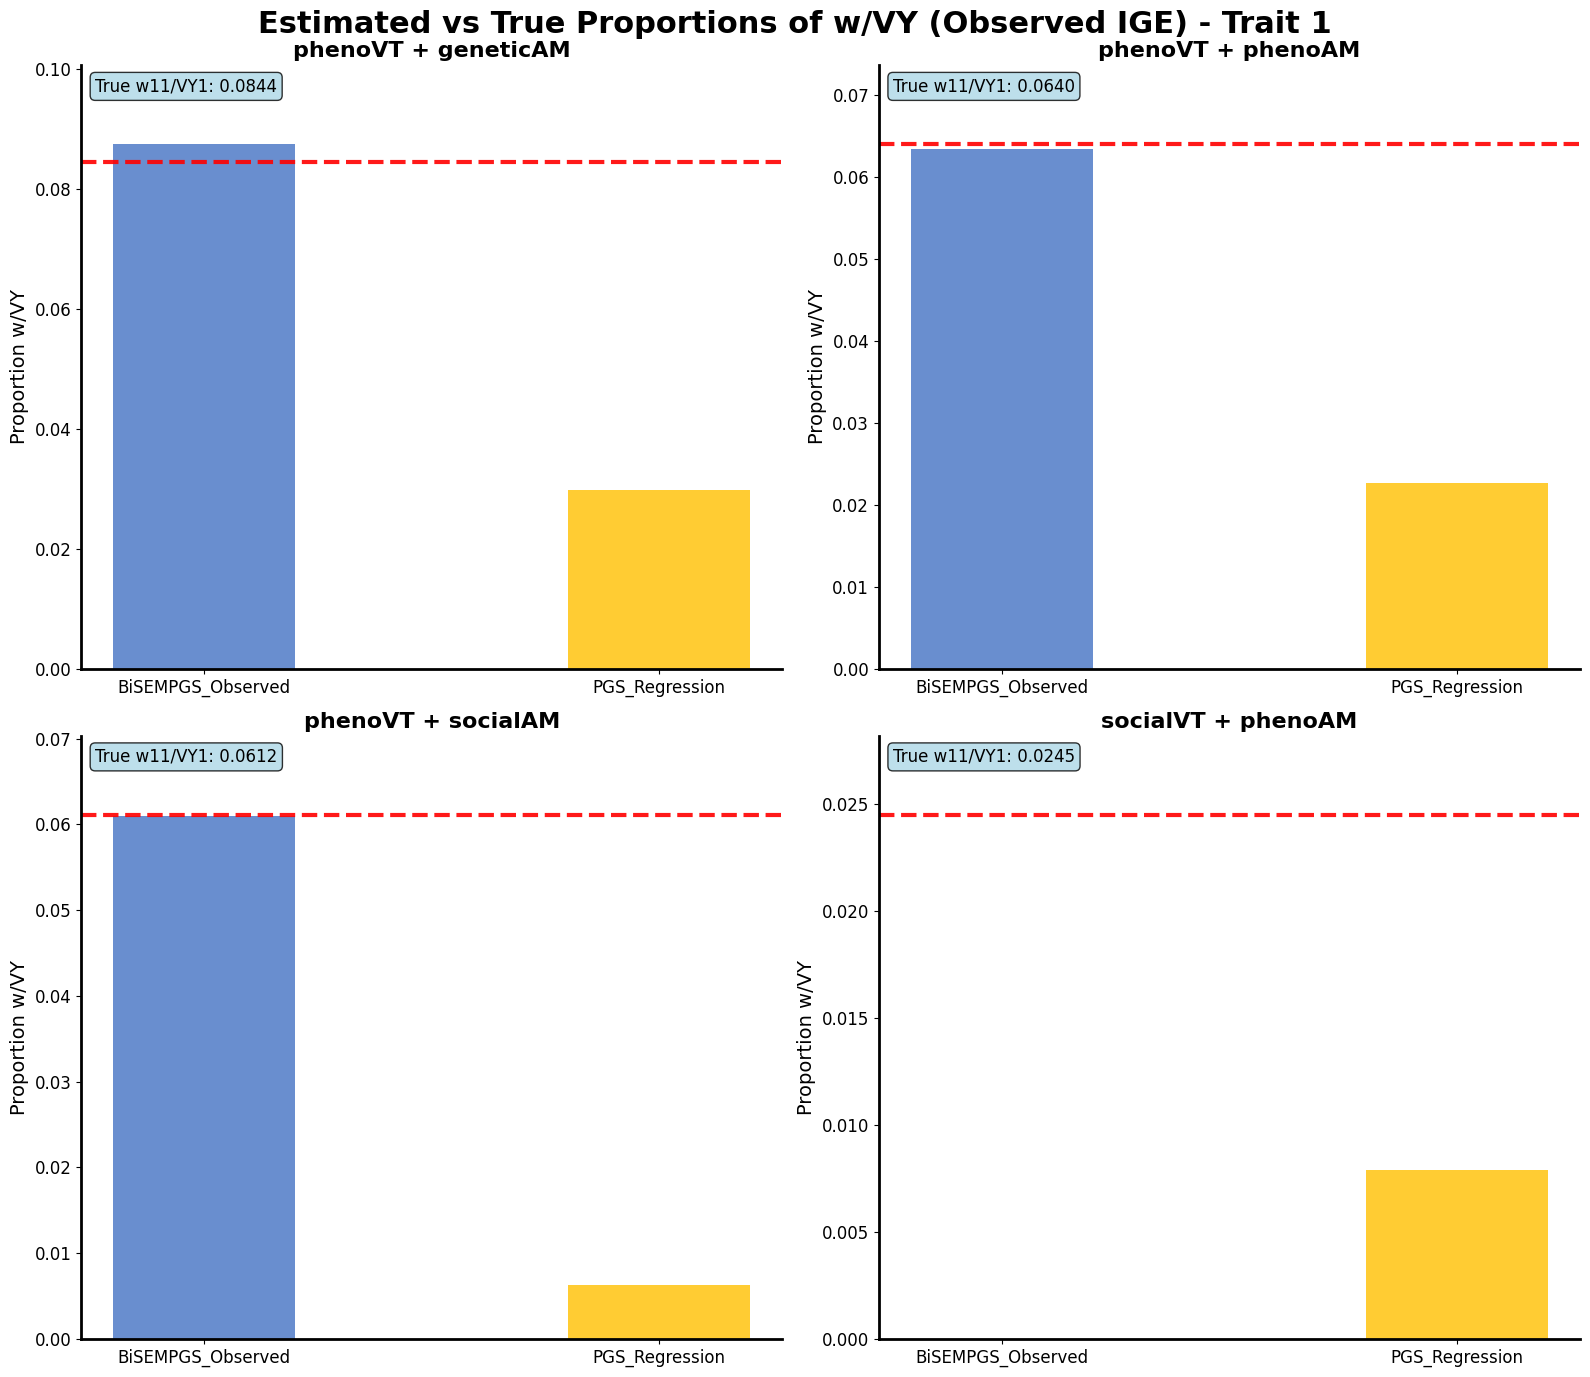

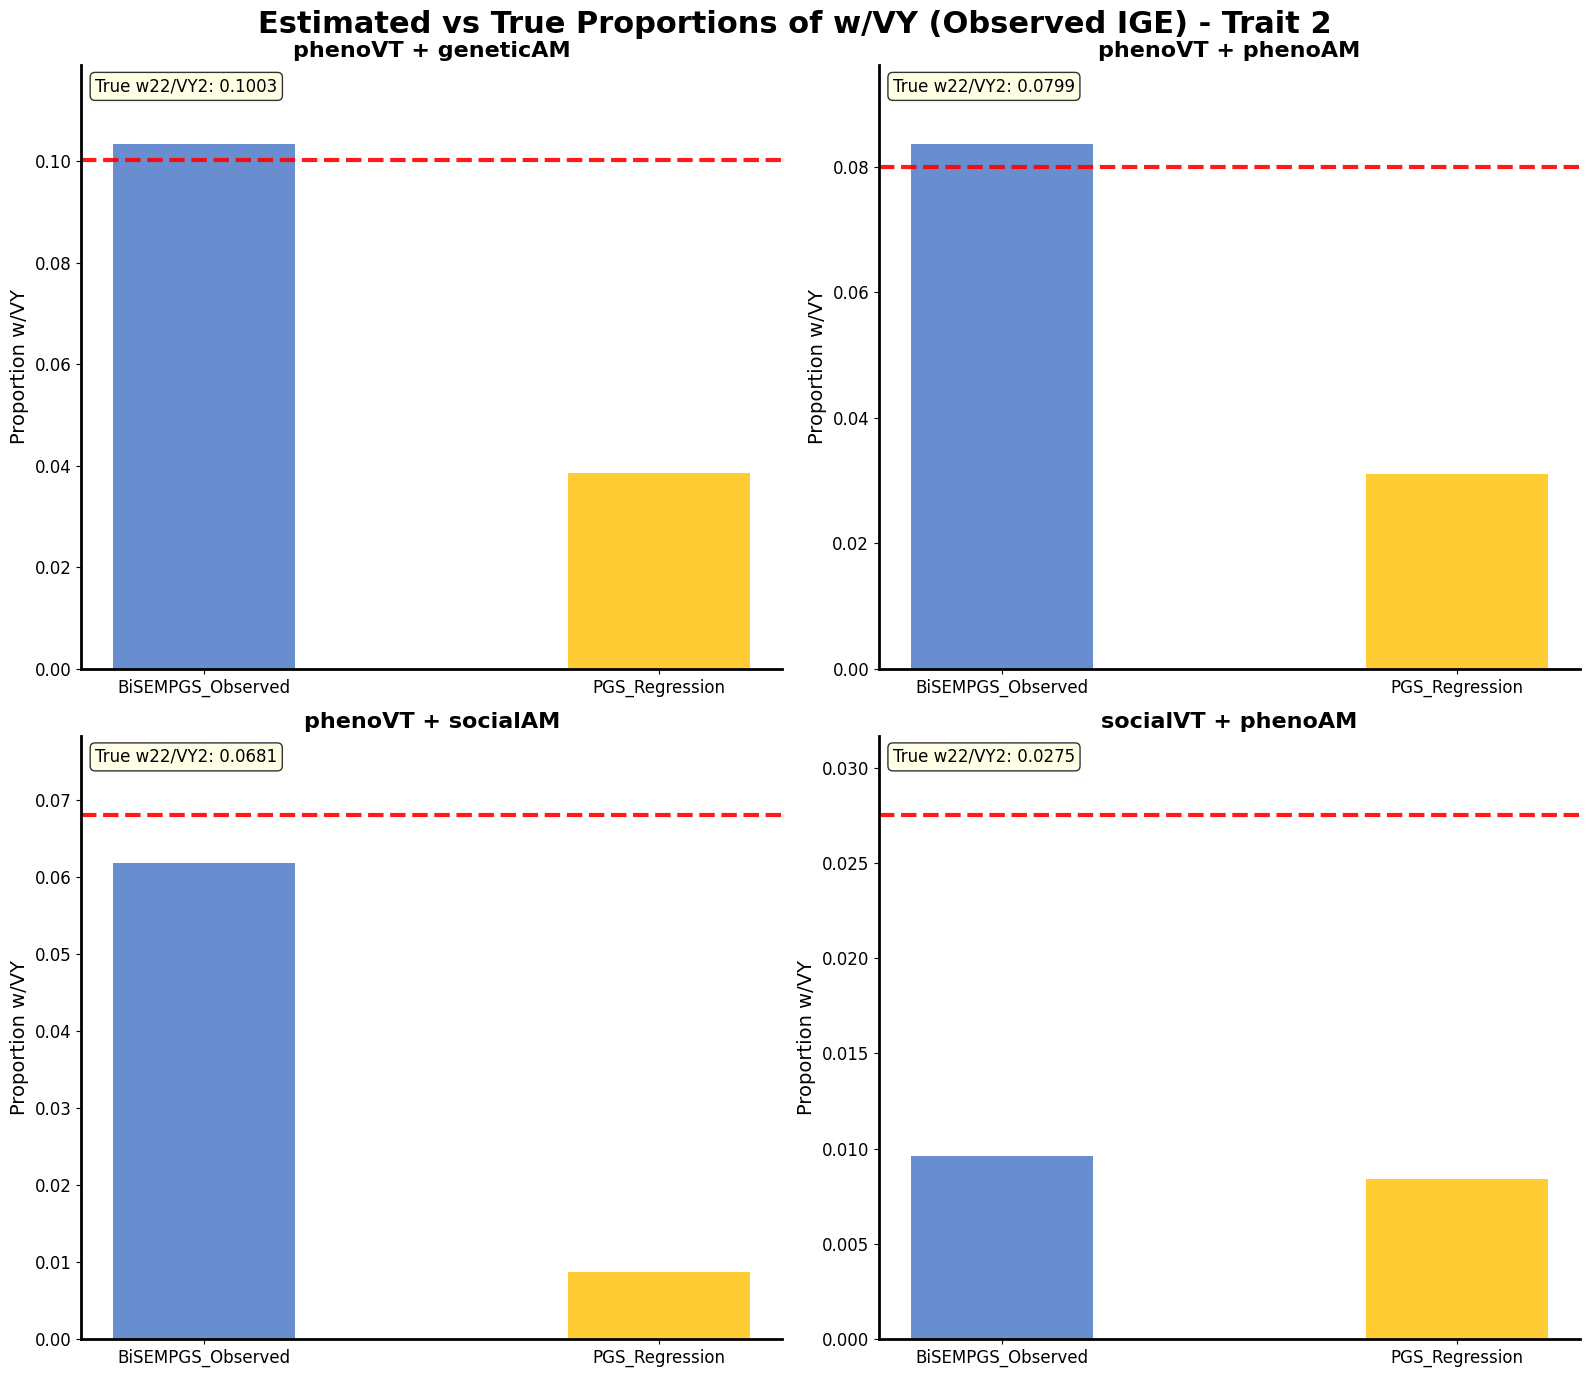


=== TRUE VALUES SUMMARY (w/VY - Observed IGE) ===

phenoVT_geneticAM:
  Trait1 - w11/VY1: 0.0844, w12/VY1: 0.1148
  Trait2 - w21/VY2: 0.0507, w22/VY2: 0.1003

phenoVT_phenoAM:
  Trait1 - w11/VY1: 0.0640, w12/VY1: 0.0919
  Trait2 - w21/VY2: 0.0311, w22/VY2: 0.0799

phenoVT_socialAM:
  Trait1 - w11/VY1: 0.0612, w12/VY1: 0.0801
  Trait2 - w21/VY2: 0.0352, w22/VY2: 0.0681

socialVT_phenoAM:
  Trait1 - w11/VY1: 0.0245, w12/VY1: 0.0201
  Trait2 - w21/VY2: 0.0255, w22/VY2: 0.0275

Figures saved to: /Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/figures


In [124]:
# Create separate figures for Trait 1 and Trait 2 showing estimated vs true proportions of w/VY
import matplotlib.pyplot as plt
import numpy as np
import os

# Create figures directory if it doesn't exist
figures_dir = '/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/figures'
os.makedirs(figures_dir, exist_ok=True)

# Extract estimated values for BiSEMPGS_Observed and PGS_Regression
estimated_data = df_comparison[(df_comparison['Method'].isin(['BiSEMPGS_Observed', 'PGS_Regression']))]

# Define condition names and positions
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
condition_titles = ['phenoVT + geneticAM', 'phenoVT + phenoAM', 'phenoVT + socialAM', 'socialVT + phenoAM']
positions = [(0,0), (0,1), (1,0), (1,1)]

# Colors for different methods - blue and warm yellow
colors = {'BiSEMPGS_Observed': '#4472C4', 'PGS_Regression': '#FFC000'}
methods = ['BiSEMPGS_Observed', 'PGS_Regression']

# Create figure for Trait 1
fig1, axes1 = plt.subplots(2, 2, figsize=(16, 14))
fig1.suptitle('Estimated vs True Proportions of w/VY (Observed IGE) - Trait 1', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes1[row, col]
    
    # Extract data for this condition and Trait1
    condition_data = estimated_data[(estimated_data['Condition'] == condition) & 
                                   (estimated_data['Trait'] == 'Trait1')]
    
    # Get true values
    if condition in true_proportions:
        true_w_over_vy = true_proportions[condition]['w_over_VY']
        true_trait1_w11 = true_w_over_vy[0, 0]  # w11/VY1 (self-effect for Trait1)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait1_w11, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True w11/VY1' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait1_w11) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion w/VY', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True w11/VY1: {true_trait1_w11:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Add legend to the first subplot with larger font
#axes1[0,0].legend(loc='upper right', fontsize=14)

plt.tight_layout()
# Save figure
fig1.savefig(os.path.join(figures_dir, 'trait1_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Create figure for Trait 2
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 14))
fig2.suptitle('Estimated vs True Proportions of w/VY (Observed IGE) - Trait 2', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes2[row, col]
    
    # Extract data for this condition and Trait2
    condition_data = estimated_data[(estimated_data['Condition'] == condition) & 
                                   (estimated_data['Trait'] == 'Trait2')]
    
    # Get true values
    if condition in true_proportions:
        true_w_over_vy = true_proportions[condition]['w_over_VY']
        true_trait2_w22 = true_w_over_vy[1, 1]  # w22/VY2 (self-effect for Trait2)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait2_w22, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True w22/VY2' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait2_w22) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion w/VY', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True w22/VY2: {true_trait2_w22:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Add legend to the first subplot with larger font
#axes2[0,0].legend(loc='upper right', fontsize=14)

plt.tight_layout()
# Save figure
fig2.savefig(os.path.join(figures_dir, 'trait2_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print summary of true values for reference
print("\n=== TRUE VALUES SUMMARY (w/VY - Observed IGE) ===")
for condition in conditions:
    if condition in true_proportions:
        true_w_over_vy = true_proportions[condition]['w_over_VY']
        print(f"\n{condition}:")
        print(f"  Trait1 - w11/VY1: {true_w_over_vy[0,0]:.4f}, w12/VY1: {true_w_over_vy[0,1]:.4f}")
        print(f"  Trait2 - w21/VY2: {true_w_over_vy[1,0]:.4f}, w22/VY2: {true_w_over_vy[1,1]:.4f}")

print(f"\nFigures saved to: {figures_dir}")

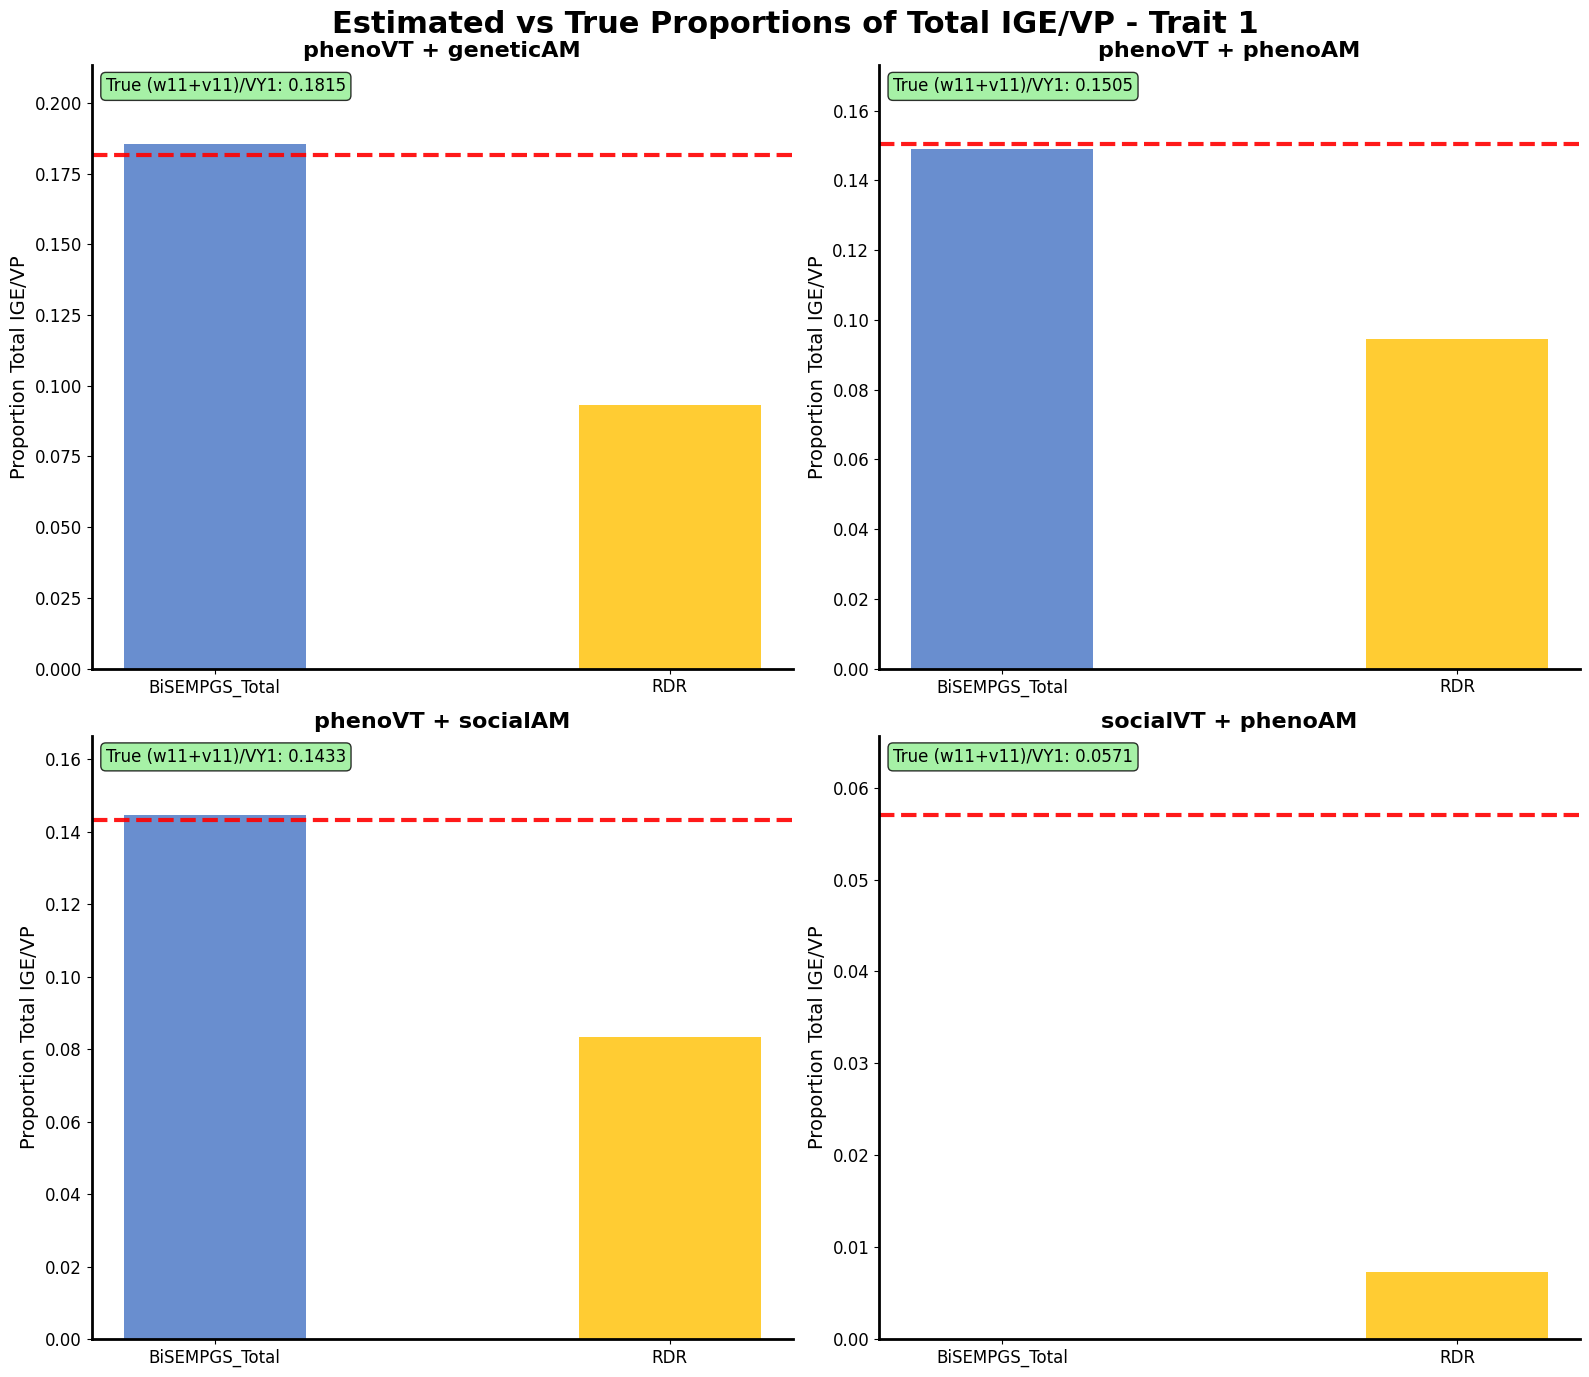

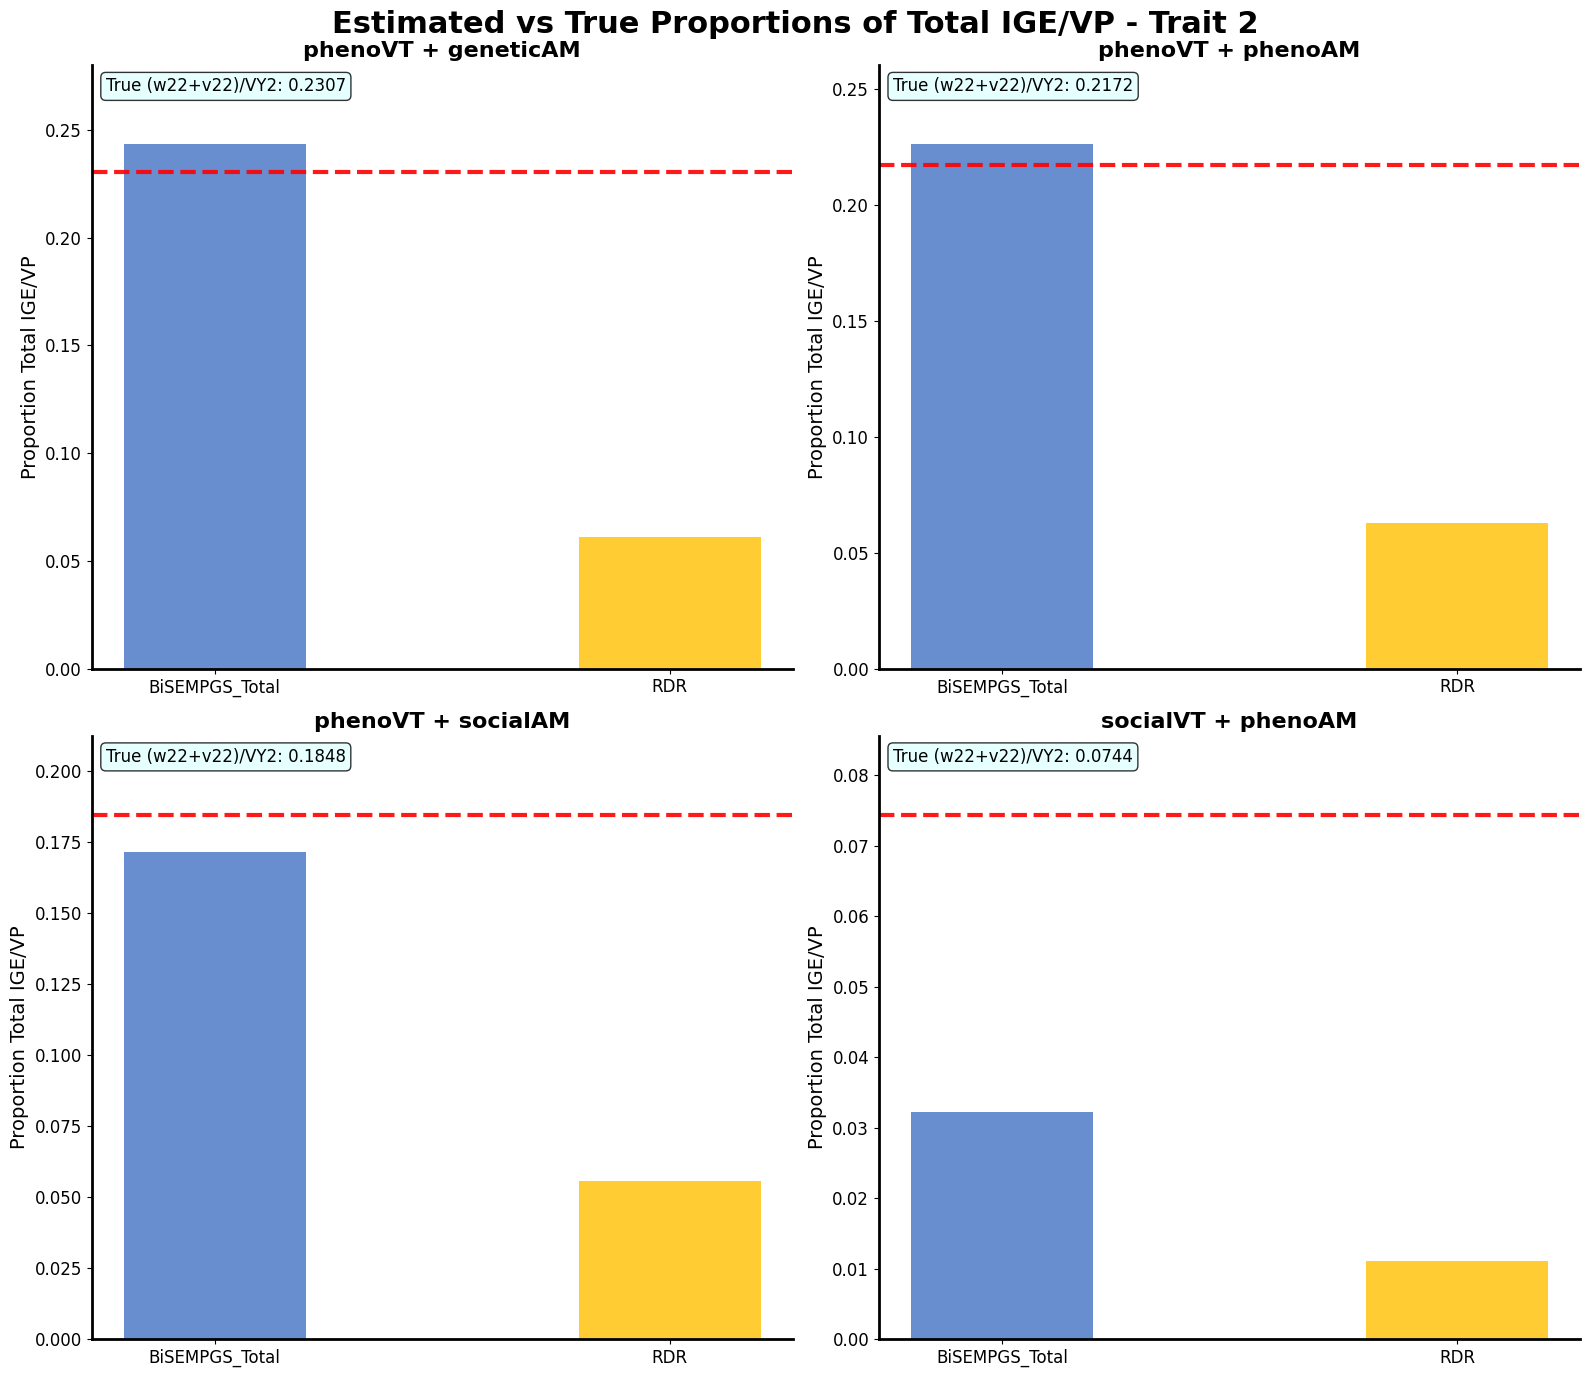


=== TRUE VALUES SUMMARY (Total IGE: (w+v)/VY) ===

phenoVT_geneticAM:
  Trait1 - (w11+v11)/VY1: 0.1815, (w12+v12)/VY1: 0.2626
  Trait2 - (w21+v21)/VY2: 0.1094, (w22+v22)/VY2: 0.2307

phenoVT_phenoAM:
  Trait1 - (w11+v11)/VY1: 0.1505, (w12+v12)/VY1: 0.2485
  Trait2 - (w21+v21)/VY2: 0.0745, (w22+v22)/VY2: 0.2172

phenoVT_socialAM:
  Trait1 - (w11+v11)/VY1: 0.1433, (w12+v12)/VY1: 0.2164
  Trait2 - (w21+v21)/VY2: 0.0833, (w22+v22)/VY2: 0.1848

socialVT_phenoAM:
  Trait1 - (w11+v11)/VY1: 0.0571, (w12+v12)/VY1: 0.0542
  Trait2 - (w21+v21)/VY2: 0.0597, (w22+v22)/VY2: 0.0744

Total IGE figures saved to: /Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/figures


In [125]:
# Create separate figures for Trait 1 and Trait 2 showing estimated vs true proportions of total IGE/VP
# Comparing RDR and BiSEMPGS_Total methods

# Extract estimated values for BiSEMPGS_Total and RDR methods
total_ige_data = df_comparison[(df_comparison['Method'].isin(['BiSEMPGS_Total', 'RDR']))]

# Define condition names and positions (same as before)
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
condition_titles = ['phenoVT + geneticAM', 'phenoVT + phenoAM', 'phenoVT + socialAM', 'socialVT + phenoAM']
positions = [(0,0), (0,1), (1,0), (1,1)]

# Colors for different methods - same as observed IGE figures (blue and warm yellow)
colors = {'BiSEMPGS_Total': '#4472C4', 'RDR': '#FFC000'}
methods = ['BiSEMPGS_Total', 'RDR']

# Create figure for Trait 1 Total IGE
fig3, axes3 = plt.subplots(2, 2, figsize=(16, 14))
fig3.suptitle('Estimated vs True Proportions of Total IGE/VP - Trait 1', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes3[row, col]
    
    # Extract data for this condition and Trait1
    condition_data = total_ige_data[(total_ige_data['Condition'] == condition) & 
                                   (total_ige_data['Trait'] == 'Trait1')]
    
    # Get true values for total IGE (w+v)/VY
    if condition in true_proportions:
        true_wv_over_vy = true_proportions[condition]['wv_over_VY']
        true_trait1_wv11 = true_wv_over_vy[0, 0]  # (w11+v11)/VY1 (total IGE self-effect for Trait1)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait1_wv11, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True (w11+v11)/VY1' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait1_wv11) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion Total IGE/VP', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True (w11+v11)/VY1: {true_trait1_wv11:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
# Save figure
fig3.savefig(os.path.join(figures_dir, 'trait1_total_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Create figure for Trait 2 Total IGE
fig4, axes4 = plt.subplots(2, 2, figsize=(16, 14))
fig4.suptitle('Estimated vs True Proportions of Total IGE/VP - Trait 2', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes4[row, col]
    
    # Extract data for this condition and Trait2
    condition_data = total_ige_data[(total_ige_data['Condition'] == condition) & 
                                   (total_ige_data['Trait'] == 'Trait2')]
    
    # Get true values for total IGE (w+v)/VY
    if condition in true_proportions:
        true_wv_over_vy = true_proportions[condition]['wv_over_VY']
        true_trait2_wv22 = true_wv_over_vy[1, 1]  # (w22+v22)/VY2 (total IGE self-effect for Trait2)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait2_wv22, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True (w22+v22)/VY2' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait2_wv22) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion Total IGE/VP', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True (w22+v22)/VY2: {true_trait2_wv22:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
# Save figure
fig4.savefig(os.path.join(figures_dir, 'trait2_total_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print summary of true values for total IGE reference
print("\n=== TRUE VALUES SUMMARY (Total IGE: (w+v)/VY) ===")
for condition in conditions:
    if condition in true_proportions:
        true_wv_over_vy = true_proportions[condition]['wv_over_VY']
        print(f"\n{condition}:")
        print(f"  Trait1 - (w11+v11)/VY1: {true_wv_over_vy[0,0]:.4f}, (w12+v12)/VY1: {true_wv_over_vy[0,1]:.4f}")
        print(f"  Trait2 - (w21+v21)/VY2: {true_wv_over_vy[1,0]:.4f}, (w22+v22)/VY2: {true_wv_over_vy[1,1]:.4f}")

print(f"\nTotal IGE figures saved to: {figures_dir}")      

In [126]:
# Extract true matrix values from Averaged_Results folder
import re

def parse_matrix_file(filepath):
    """Parse a matrix file and extract VP, w, and v matrices"""
    with open(filepath, 'r') as f:
        content = f.read()
    
    # Extract matrices using regex
    vp_pattern = r"Average 'VP' Matrix.*?\[\[(.*?)\]\]"
    w_pattern = r"Average 'w' Matrix.*?\[\[(.*?)\]\]"
    v_pattern = r"Average 'v' Matrix.*?\[\[(.*?)\]\]"
    vf_pattern = r"Average 'VF' Matrix.*?\[\[(.*?)\]\]"
    
    vp_match = re.search(vp_pattern, content, re.DOTALL)
    w_match = re.search(w_pattern, content, re.DOTALL)
    v_match = re.search(v_pattern, content, re.DOTALL)
    vf_match = re.search(vf_pattern, content, re.DOTALL)
    
    def parse_matrix_string(matrix_str):
        # Split by rows (comma followed by newline)
        rows = matrix_str.strip().split('],\n [')
        matrix = []
        for row in rows:
            # Clean up the row string and split by comma
            row = row.replace('[', '').replace(']', '').strip()
            values = [float(x.strip()) for x in row.split(',')]
            matrix.append(values)
        return np.array(matrix)
    
    vp_matrix = parse_matrix_string(vp_match.group(1)) if vp_match else None
    w_matrix = parse_matrix_string(w_match.group(1)) if w_match else None
    v_matrix = parse_matrix_string(v_match.group(1)) if v_match else None
    vf_matrix = parse_matrix_string(vf_match.group(1)) if vf_match else None
    
    return vp_matrix, w_matrix, v_matrix, vf_matrix

# Define conditions and file paths
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
base_path = '/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/Averaged_Results/'

# Store results
true_proportions = {}

for condition in conditions:
    filepath = f"{base_path}Averaged_Matrices_{condition}_Gen1.txt"
    vp_matrix, w_matrix, v_matrix, vf_matrix= parse_matrix_file(filepath)
    
    # Calculate proportions elementwise
    # w/VY (observed IGE / phenotypic variance)
    w_over_vy = w_matrix / np.diag(vp_matrix)[:, np.newaxis]  # Divide each row by corresponding diagonal element
    
    # (w+v)/VY (observed IGE + latent IGE / phenotypic variance)
    wv_over_vy = (w_matrix + v_matrix) / np.diag(vp_matrix)[:, np.newaxis]
    
    # (w+v+vf)/VY (observed IGE + latent IGE + VF / phenotypic variance)
    wvf_over_vy = (w_matrix + v_matrix + vf_matrix) / np.diag(vp_matrix)[:, np.newaxis]
    
    true_proportions[condition] = {
        'VP_matrix': vp_matrix,
        'w_matrix': w_matrix,
        'v_matrix': v_matrix,
        'w_over_VY': w_over_vy,
        'wv_over_VY': wv_over_vy,
        'wvf_over_VY': wvf_over_vy
    }
    
    print(f"\n=== {condition} ===")
    print(f"VP matrix (phenotypic variance-covariance):")
    print(vp_matrix)
    print(f"\nw matrix (observed IGE):")
    print(w_matrix)
    print(f"\nv matrix (latent IGE):")
    print(v_matrix)
    print(f"\nTrue proportions w/VY (observed IGE):")
    print(f"Trait 1: w11/VY1 = {w_over_vy[0,0]:.4f}, w12/VY1 = {w_over_vy[0,1]:.4f}")
    print(f"Trait 2: w21/VY2 = {w_over_vy[1,0]:.4f}, w22/VY2 = {w_over_vy[1,1]:.4f}")
    print(f"\nTrue proportions (w+v)/VY (observed IGE + latent IGE):")
    print(f"Trait 1: (w11+v11)/VY1 = {wv_over_vy[0,0]:.4f}, (w12+v12)/VY1 = {wv_over_vy[0,1]:.4f}")
    print(f"Trait 2: (w21+v21)/VY2 = {wv_over_vy[1,0]:.4f}, (w22+v22)/VY2 = {wv_over_vy[1,1]:.4f}")
    print(f"\nTrue proportions (w+v+vf)/VY (observed IGE + latent IGE + VF):")
    print(f"Trait 1: (w11+v11+vf11)/VY1 = {wvf_over_vy[0,0]:.4f}, (w12+v12+vf12)/VY1 = {wvf_over_vy[0,1]:.4f}")
    print(f"Trait 2: (w21+v21+vf21)/VY2 = {wvf_over_vy[1,0]:.4f}, (w22+v22+vf22)/VY2 = {wvf_over_vy[1,1]:.4f}")
    print("-" * 60)


=== phenoVT_geneticAM ===
VP matrix (phenotypic variance-covariance):
[[1.4425 0.4568]
 [0.4568 1.4982]]

w matrix (observed IGE):
[[0.0842 0.1031]
 [0.0477 0.0988]]

v matrix (latent IGE):
[[0.1049 0.1539]
 [0.0605 0.1488]]

True proportions w/VY (observed IGE):
Trait 1: w11/VY1 = 0.0584, w12/VY1 = 0.0715
Trait 2: w21/VY2 = 0.0318, w22/VY2 = 0.0659

True proportions (w+v)/VY (observed IGE + latent IGE):
Trait 1: (w11+v11)/VY1 = 0.1311, (w12+v12)/VY1 = 0.1782
Trait 2: (w21+v21)/VY2 = 0.0722, (w22+v22)/VY2 = 0.1653

True proportions (w+v+vf)/VY (observed IGE + latent IGE + VF):
Trait 1: (w11+v11+vf11)/VY1 = 0.1933, (w12+v12+vf12)/VY1 = 0.2301
Trait 2: (w21+v21+vf21)/VY2 = 0.1222, (w22+v22+vf22)/VY2 = 0.2095
------------------------------------------------------------

=== phenoVT_phenoAM ===
VP matrix (phenotypic variance-covariance):
[[1.4271 0.4491]
 [0.4491 1.486 ]]

w matrix (observed IGE):
[[0.0802 0.0943]
 [0.0448 0.0906]]

v matrix (latent IGE):
[[0.1071 0.1601]
 [0.0614 0.1553]

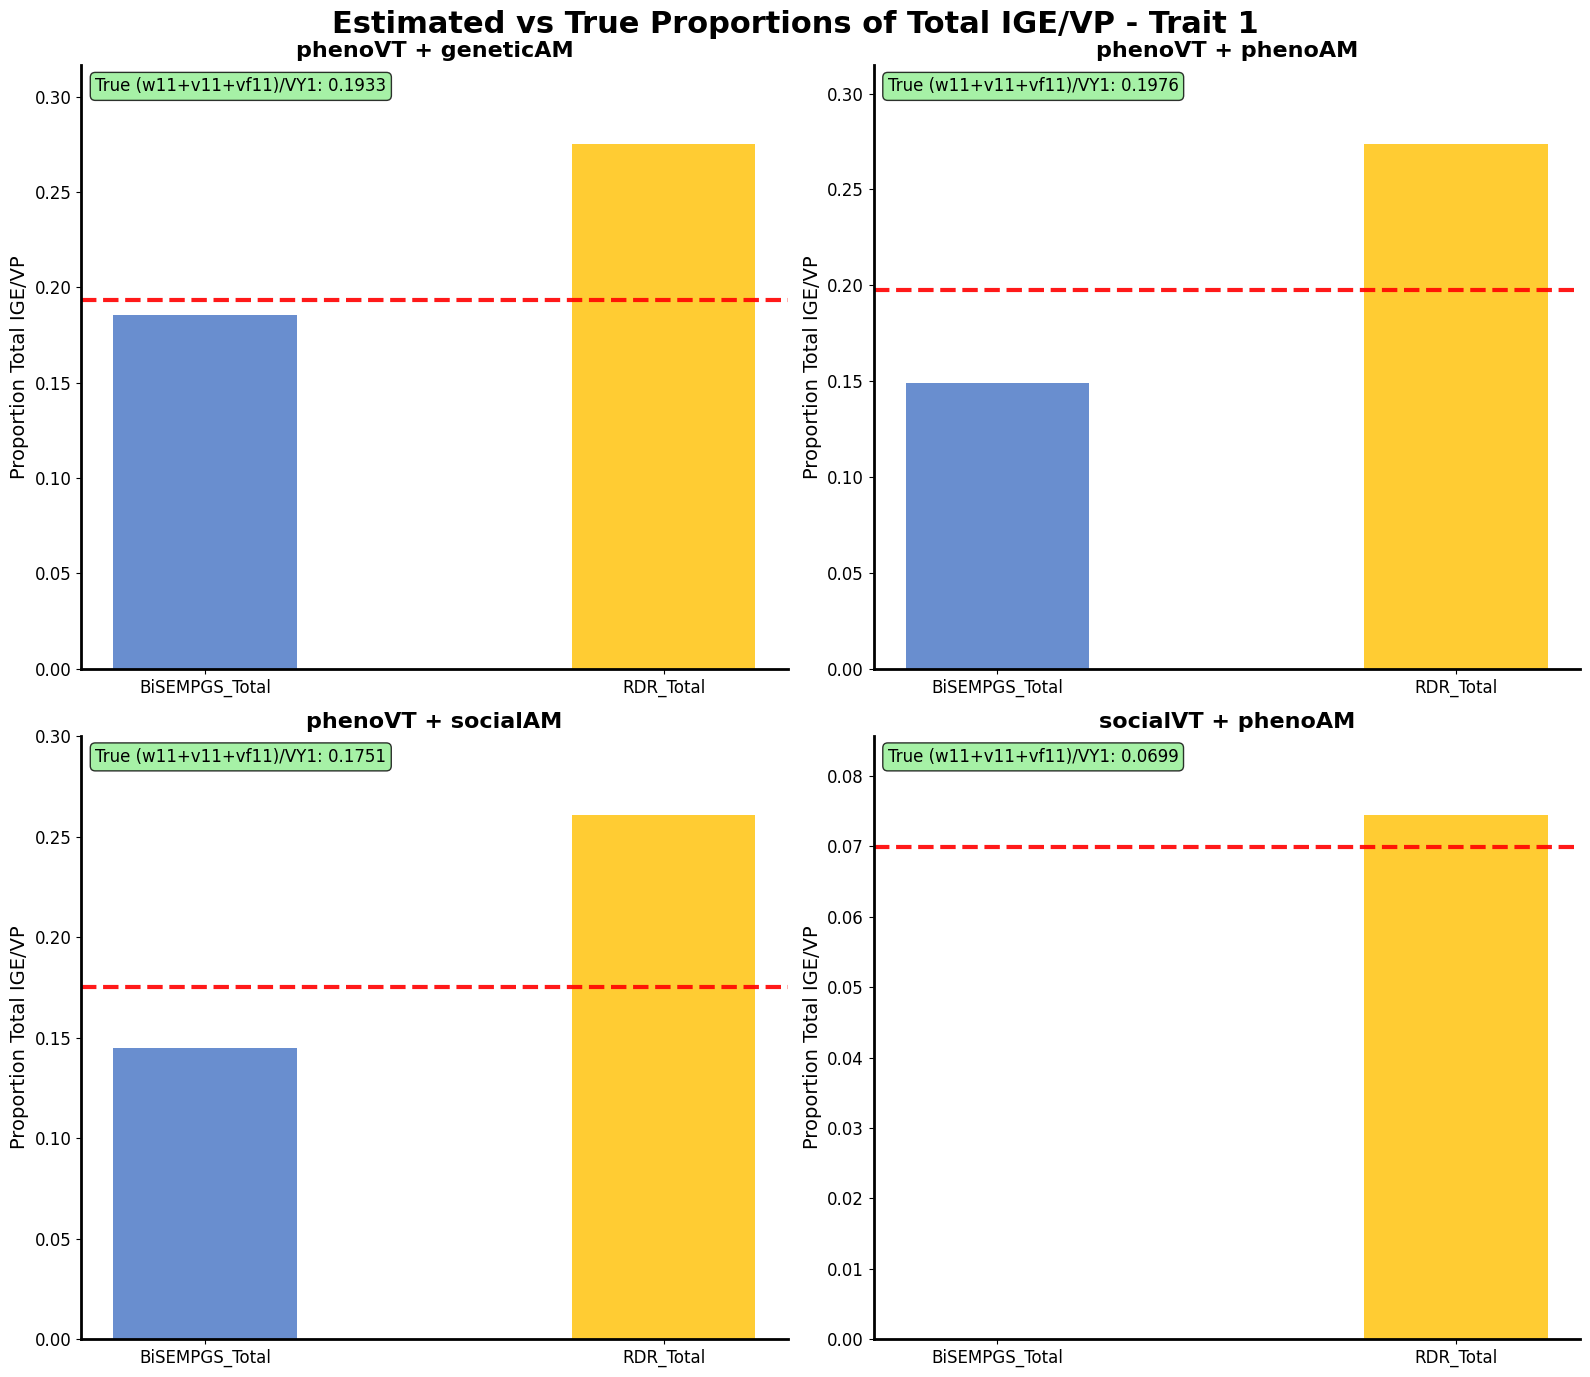

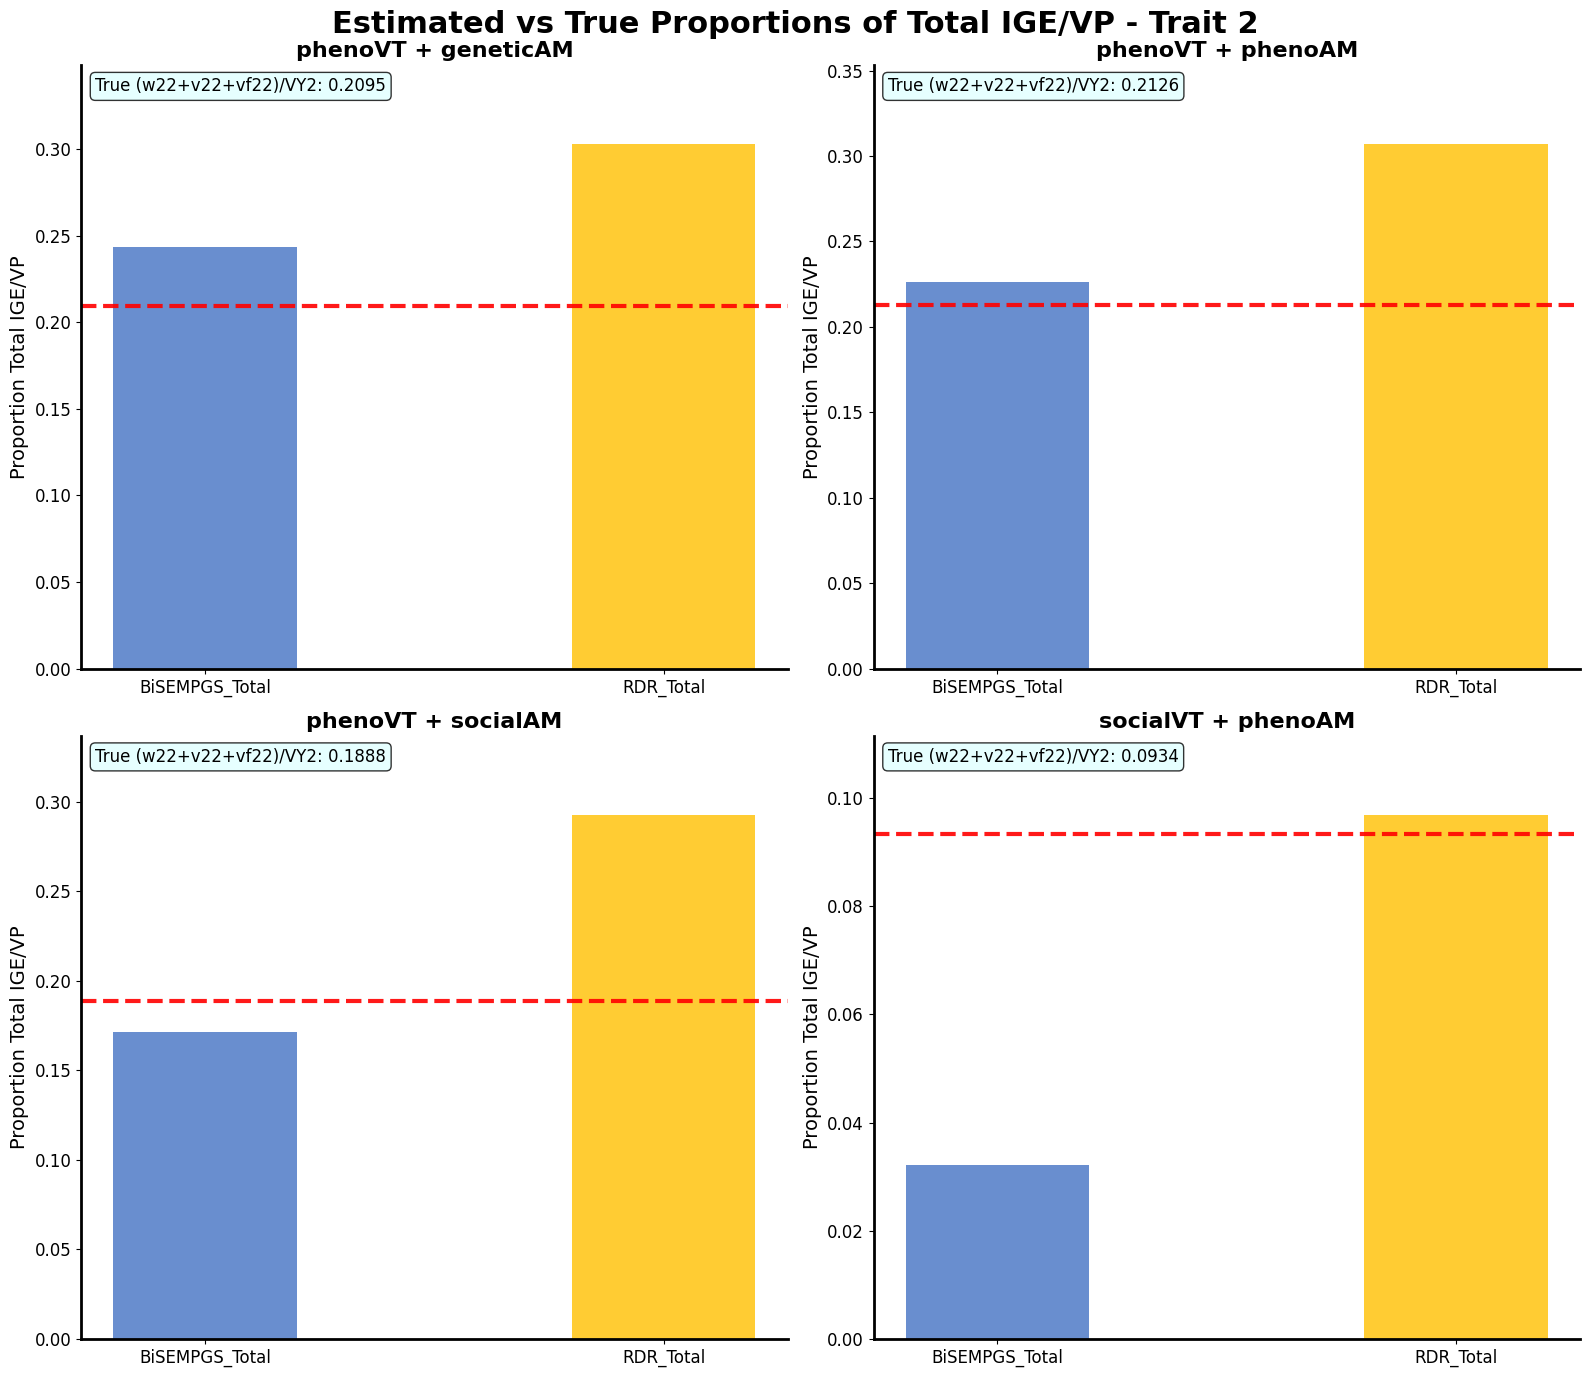


=== TRUE VALUES SUMMARY (Total IGE: (w+v+vf)/VY) ===

phenoVT_geneticAM:
  Trait1 - (w11+v11+vf11)/VY1: 0.1933, (w12+v12+vf12)/VY1: 0.2301
  Trait2 - (w21+v21+vf21)/VY2: 0.1222, (w22+v22+vf22)/VY2: 0.2095

phenoVT_phenoAM:
  Trait1 - (w11+v11+vf11)/VY1: 0.1976, (w12+v12+vf12)/VY1: 0.2337
  Trait2 - (w21+v21+vf21)/VY2: 0.1247, (w22+v22+vf22)/VY2: 0.2126

phenoVT_socialAM:
  Trait1 - (w11+v11+vf11)/VY1: 0.1751, (w12+v12+vf12)/VY1: 0.2082
  Trait2 - (w21+v21+vf21)/VY2: 0.1103, (w22+v22+vf22)/VY2: 0.1888

socialVT_phenoAM:
  Trait1 - (w11+v11+vf11)/VY1: 0.0699, (w12+v12+vf12)/VY1: 0.0669
  Trait2 - (w21+v21+vf21)/VY2: 0.0692, (w22+v22+vf22)/VY2: 0.0934

Total IGE figures saved to: /Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/figures


In [127]:
# Create separate figures for Trait 1 and Trait 2 showing estimated vs true proportions of total IGE/VP
# Comparing RDR_Total and BiSEMPGS_Total methods

# Extract estimated values for BiSEMPGS_Total and RDR_Total methods
total_ige_data = df_comparison[(df_comparison['Method'].isin(['BiSEMPGS_Total', 'RDR_Total']))]

# Define condition names and positions (same as before)
conditions = ['phenoVT_geneticAM', 'phenoVT_phenoAM', 'phenoVT_socialAM', 'socialVT_phenoAM']
condition_titles = ['phenoVT + geneticAM', 'phenoVT + phenoAM', 'phenoVT + socialAM', 'socialVT + phenoAM']
positions = [(0,0), (0,1), (1,0), (1,1)]

# Colors for different methods - same as observed IGE figures (blue and warm yellow)
colors = {'BiSEMPGS_Total': '#4472C4', 'RDR_Total': '#FFC000'}
methods = ['BiSEMPGS_Total', 'RDR_Total']

# Create figure for Trait 1 Total IGE
fig3, axes3 = plt.subplots(2, 2, figsize=(16, 14))
fig3.suptitle('Estimated vs True Proportions of Total IGE/VP - Trait 1', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes3[row, col]
    
    # Extract data for this condition and Trait1
    condition_data = total_ige_data[(total_ige_data['Condition'] == condition) & 
                                   (total_ige_data['Trait'] == 'Trait1')]
    
    # Get true values for total IGE (w+v+vf)/VY
    if condition in true_proportions:
        true_wvf_over_vy = true_proportions[condition]['wvf_over_VY']
        true_trait1_wvf11 = true_wvf_over_vy[0, 0]  # (w11+v11+vf11)/VY1 (total IGE self-effect for Trait1)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait1_wvf11, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True (w11+v11+vf11)/VY1' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait1_wvf11) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion Total IGE/VP', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True (w11+v11+vf11)/VY1: {true_trait1_wvf11:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
# Save figure
#fig3.savefig(os.path.join(figures_dir, 'trait1_total_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Create figure for Trait 2 Total IGE
fig4, axes4 = plt.subplots(2, 2, figsize=(16, 14))
fig4.suptitle('Estimated vs True Proportions of Total IGE/VP - Trait 2', fontsize=22, fontweight='bold')

for idx, (condition, title) in enumerate(zip(conditions, condition_titles)):
    row, col = positions[idx]
    ax = axes4[row, col]
    
    # Extract data for this condition and Trait2
    condition_data = total_ige_data[(total_ige_data['Condition'] == condition) & 
                                   (total_ige_data['Trait'] == 'Trait2')]
    
    # Get true values for total IGE (w+v+vf)/VY
    if condition in true_proportions:
        true_wvf_over_vy = true_proportions[condition]['wvf_over_VY']
        true_trait2_wvf22 = true_wvf_over_vy[1, 1]  # (w22+v22+vf22)/VY2 (total IGE self-effect for Trait2)
    
    # Plot data for each method and collect max value for y-axis adjustment
    x_pos = 0
    method_labels = []
    max_height = 0
    
    for method in methods:
        mask = condition_data['Method'] == method
        if mask.any():
            estimated_median = condition_data[mask]['Median'].iloc[0]
            max_height = max(max_height, estimated_median)
            
            # Plot bar without error bars and make it narrower
            ax.bar(x_pos, estimated_median, color=colors[method], alpha=0.8, width=0.4)
            
            if idx == 0:  # Add label only for first subplot with explicit legend entries
                ax.bar([], [], color=colors[method], alpha=1.0, label=method, edgecolor='black', linewidth=0.5)
            
            method_labels.append(method)
            x_pos += 1
    
    # Add true value as horizontal line
    ax.axhline(y=true_trait2_wvf22, color='red', linestyle='--', linewidth=3, 
               alpha=0.9, label='True (w22+v22+vf22)/VY2' if idx == 0 else "")
    
    # Set y-axis limits to extend beyond the tallest bar
    y_max = max(max_height, true_trait2_wvf22) * 1.15  # Extend 15% beyond tallest element
    ax.set_ylim(0, y_max)
    
    # Customize subplot with larger fonts
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion Total IGE/VP', fontsize=14)
    ax.set_xticks(range(len(method_labels)))
    ax.set_xticklabels(method_labels, fontsize=12)
    
    # Increase tick label sizes
    ax.tick_params(axis='y', labelsize=12)
    
    # Remove grid
    ax.grid(False)
    ax.set_facecolor('white')
    
    # Remove top and right spines, make remaining spines wider
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Add text showing true value with larger font
    ax.text(0.02, 0.98, f'True (w22+v22+vf22)/VY2: {true_trait2_wvf22:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
# Save figure
#fig4.savefig(os.path.join(figures_dir, 'trait2_total_ige_proportions.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print summary of true values for total IGE reference
print("\n=== TRUE VALUES SUMMARY (Total IGE: (w+v+vf)/VY) ===")
for condition in conditions:
    if condition in true_proportions:
        true_wvf_over_vy = true_proportions[condition]['wvf_over_VY']
        print(f"\n{condition}:")
        print(f"  Trait1 - (w11+v11+vf11)/VY1: {true_wvf_over_vy[0,0]:.4f}, (w12+v12+vf12)/VY1: {true_wvf_over_vy[0,1]:.4f}")
        print(f"  Trait2 - (w21+v21+vf21)/VY2: {true_wvf_over_vy[1,0]:.4f}, (w22+v22+vf22)/VY2: {true_wvf_over_vy[1,1]:.4f}")

print(f"\nTotal IGE figures saved to: {figures_dir}")